In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NUM_COLORS = 20

cm = plt.get_cmap('tab20')
color_list = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)][:15]

SMALL_SIZE = 20
# plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

In [2]:
cogview_res_np = np.load("cogview_ann.npy")
dalle_res_np = np.load("dalle_ann.npy")
stable_res_np = np.load("stable_ann.npy")

gender_list = ['woman', 'man']
att_list = ['in boots', 'in slippers', 'in jeans', 'in shorts', 'in slacks', 'in a dress', 'in a skirt', 'in a suit', 'in a shirt', \
            'in uniform', 'in a jacket', 'in a hat', 'with a tie', 'with a mask', 'with gloves']

In [3]:
def get_ground_truth(res_np):
  ground_truth = {'man':[], 'woman':[]}
  for i in range(15):
    f_bas_ann = res_np[0, 0:80, i].reshape(80)
    f_att_ann = res_np[0, 80 * (i + 1):80 * (i+2), i].reshape(80)
    m_bas_ann = res_np[1, 0:80, i].reshape(80)
    m_att_ann = res_np[1, 80 * (i + 1):80 * (i+2), i].reshape(80)

    ground_truth['woman'].append(np.concatenate([f_bas_ann, f_att_ann], axis=0))
    ground_truth['man'].append(np.concatenate([m_bas_ann, m_att_ann], axis=0))
  return ground_truth

cogview_ground_truth = get_ground_truth(cogview_res_np)
dalle_ground_truth = get_ground_truth(dalle_res_np)
stable_ground_truth = get_ground_truth(stable_res_np)

In [4]:
def print_list(alist, abs=False, avg=True):
    if abs:
        return [f"{item:.2f}" for item in alist] + [f"{np.mean(np.abs(alist)):.2f}"]
    if not avg:
        return [f"{item:.2f}" for item in alist]
    return [f"{item:.2f}" for item in alist] + [f"{np.mean(alist):.2f}"]

def get_eval(res_np):
    f_base = []
    m_base = []
    for i in range(len(att_list)):
        # print(att_list[i])
        # print("woman", np.mean(res_np[0, :80, i]))
        f_base.append(np.mean(res_np[0, :80, i]))
        # print("man", np.mean(res_np[1, :80, i]))
        m_base.append(np.mean(res_np[1, :80, i]))

    f_att = []
    m_att = []
    for i in range(len(att_list)):
        # print(att_list[i])
        # print("woman", np.mean(res_np[0, 80 * (i+1): 80 * (i+2), i]))
        f_att.append(np.mean(res_np[0, 80 * (i+1): 80 * (i+2), i]))
        # print("man",   np.mean(res_np[1, 80 * (i+1): 80 * (i+2), i]))
        m_att.append(np.mean(res_np[1, 80 * (i+1): 80 * (i+2), i]))

    print(f_base)
    print(f_att)
    print()
    print(m_base)
    print(m_att)
    print()

    return f_base, m_base, f_att, m_att

print("cogview2")
cf_base, cm_base, cf_att, cm_att = get_eval(cogview_res_np)
print("dalle")
df_base, dm_base, df_att, dm_att = get_eval(dalle_res_np)
print("stable")
sf_base, sm_base, sf_att, sm_att = get_eval(stable_res_np)

cogview2
[0.0125, 0.0, 0.1125, 0.1375, 0.05, 0.1375, 0.05, 0.0125, 0.05, 0.0125, 0.15, 0.15, 0.0, 0.0125, 0.0625]
[0.225, 0.0625, 0.7875, 0.4875, 0.05, 0.65, 0.6375, 0.375, 0.35, 0.175, 0.5125, 0.6625, 0.3125, 0.3875, 0.55]

[0.0125, 0.0, 0.1, 0.1375, 0.075, 0.0, 0.0, 0.0125, 0.075, 0.0125, 0.2125, 0.1625, 0.0125, 0.025, 0.0625]
[0.0875, 0.0375, 0.6875, 0.5625, 0.1, 0.0125, 0.1375, 0.675, 0.375, 0.325, 0.65, 0.5875, 0.5, 0.5, 0.4125]

dalle
[0.075, 0.0125, 0.3125, 0.1125, 0.0875, 0.0375, 0.05, 0.0, 0.1, 0.0, 0.2, 0.1, 0.0, 0.0, 0.075]
[0.975, 0.5375, 0.975, 0.975, 0.8125, 0.9875, 0.975, 0.9875, 0.95, 0.9125, 0.9875, 0.875, 0.9375, 0.95, 1.0]

[0.0625, 0.0, 0.2125, 0.2, 0.1875, 0.0, 0.0, 0.0375, 0.2875, 0.0125, 0.25, 0.1, 0.0125, 0.025, 0.0375]
[0.9, 0.675, 1.0, 0.9875, 0.9875, 0.1125, 0.7875, 1.0, 0.975, 0.8875, 1.0, 0.925, 1.0, 1.0, 0.9625]

stable
[0.0625, 0.0125, 0.1125, 0.15, 0.0875, 0.0875, 0.0625, 0.0, 0.0375, 0.0, 0.3125, 0.075, 0.0, 0.025, 0.1]
[0.6625, 0.3375, 0.9375, 0.7125, 

In [5]:
def get_eval_context(res_np):
    f_base = []
    m_base = []
    for i in range(len(att_list)):
        f_base.append(np.mean(res_np[0, :80, i].reshape(5, 16), axis=0))
        m_base.append(np.mean(res_np[1, :80, i].reshape(5, 16), axis=0))

    f_att = []
    m_att = []
    for i in range(len(att_list)):
        f_att.append(np.mean(res_np[0, 80 * (i+1): 80 * (i+2), i].reshape(5, 16), axis=0))
        m_att.append(np.mean(res_np[1, 80 * (i+1): 80 * (i+2), i].reshape(5, 16), axis=0))

    return np.array(f_base), np.array(m_base), np.array(f_att), np.array(m_att)


cf_base_c, cm_base_c, cf_att_c, cm_att_c = get_eval_context(cogview_res_np)
df_base_c, dm_base_c, df_att_c, dm_att_c = get_eval_context(dalle_res_np)
sf_base_c, sm_base_c, sf_att_c, sm_att_c = get_eval_context(stable_res_np)

In [6]:
woman_bias_stable_base = [sf_base[i] - sm_base[i] for i in range(15)]
woman_bias_stable_att = [sf_att[i] - sm_att[i] for i in range(15)]

woman_bias_dalle2_base = [df_base[i] - dm_base[i] for i in range(15)]
woman_bias_dalle2_att = [df_att[i] - dm_att[i] for i in range(15)]

woman_bias_cogvew_base = [cf_base[i] - cm_base[i] for i in range(15)]
woman_bias_cogvew_att = [cf_att[i] - cm_att[i] for i in range(15)]

In [7]:
import CLIP.clip as clip
import torch
from PIL import Image

device = "cuda:1" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-L/14", device=device)

In [8]:
def group_img_file(img_file_list):
    res = [[] for _ in range(5)]
    for file in img_file_list:
        if "_0" in file:
            res[0].append(file)
        elif "_1" in file:
            res[1].append(file)
        elif "_2" in file:
            res[2].append(file)
        elif "_3" in file:
            res[3].append(file)
        elif "_4" in file:
            res[4].append(file)
    return res

In [10]:
import os
from tqdm.notebook import tqdm

def get_feature(image_folder, text_folder):
    img_file_list = os.listdir(image_folder)
    text_file_list = os.listdir(text_folder)

    assert len(img_file_list) == 5 * len(text_file_list)

    def myFunc1(e):
        return int(e[:-4])
    
    def myFunc2(e):
        return int(e[:-6])

    text_file_list.sort(key=myFunc1)
    img_file_lists = group_img_file(img_file_list)
    for alist in img_file_lists:
        alist.sort(key=myFunc2)

    print(text_file_list[:10])
    print(img_file_lists[0][:10])
    # return

    from PIL import Image
    import numpy as np

    def get_image_feature(image_list, image_folder):
        image_features = []
        for batch_idx in range(0, len(image_list), 8):
            c_image_pos = [image_folder + image_list[idx] for idx in range(batch_idx, min(batch_idx + 8, len(image_list)))]
            c_images = [preprocess(Image.open(c_image).convert("RGB")) for c_image in c_image_pos]
            with torch.no_grad():
                image_features.append(model.encode_image(torch.tensor(np.stack(c_images)).to(device)).float())
        return torch.concat(image_features, dim=0)

    img_fes = torch.cat([get_image_feature(alist, image_folder).unsqueeze(0) for alist in img_file_lists],dim=0)

    def get_text_from_file(position):
        f = open(position, "r")
        return f.read()

    def get_text_feature(text_list, text_folder):
        text_features = []
        for batch_idx in range(0, len(text_list), 8):
            c_text_pos = [text_folder + text_list[idx] for idx in range(batch_idx, min(batch_idx + 8, len(text_list)))]
            c_texts = clip.tokenize([get_text_from_file(c_text) for c_text in c_text_pos]).to(device)
            # print(c_texts[0])
            with torch.no_grad():
                text_features.append(model.encode_text(c_texts).to(device).float())
        return torch.concat(text_features, dim=0)

    text_fes = get_text_feature(text_file_list, text_folder)

    image_features = img_fes / img_fes.norm(dim=2, keepdim=True)
    text_features = text_fes / text_fes.norm(dim=1, keepdim=True)

    return image_features.transpose(0,1), text_features

m_imgs = []
f_imgs = []
for c_model in ['cogview2', 'dalle', 'stable']:
    # Change to the path for your case.
    m_img, m_txt = get_feature(f'/mnt/sdb1/coco/ImagesRepo/man_v1_{c_model}_gen/', '/mnt/sdb1/coco/ImagesRepo/man_v1_text/')
    f_img, f_txt = get_feature(f'/mnt/sdb1/coco/ImagesRepo/woman_v1_{c_model}_gen/', '/mnt/sdb1/coco/ImagesRepo/woman_v1_text/')
    print(m_img.shape, f_img.shape)
    m_imgs.append(m_img)
    f_imgs.append(f_img)

    # Calculate the CLIP score
    logit_scale = model.logit_scale.exp()
    logits = logit_scale * torch.einsum('bij,kj->bik', torch.cat([m_img, f_img], dim=0), torch.cat([m_txt, f_txt], dim=0))
    logits = torch.mean(logits, dim=1)
    diag = torch.diagonal(logits)
    diag1 = torch.cat([diag[:16], diag[256:272]], dim=0)
    diag2 = torch.cat([diag[16:256], diag[272:]], dim=0)
    print(c_model, torch.mean(diag1), torch.mean(diag2))

['0.txt', '1.txt', '2.txt', '3.txt', '4.txt', '5.txt', '6.txt', '7.txt', '8.txt', '9.txt']
['0_0.jpg', '1_0.jpg', '2_0.jpg', '3_0.jpg', '4_0.jpg', '5_0.jpg', '6_0.jpg', '7_0.jpg', '8_0.jpg', '9_0.jpg']
['0.txt', '1.txt', '2.txt', '3.txt', '4.txt', '5.txt', '6.txt', '7.txt', '8.txt', '9.txt']
['0_0.jpg', '1_0.jpg', '2_0.jpg', '3_0.jpg', '4_0.jpg', '5_0.jpg', '6_0.jpg', '7_0.jpg', '8_0.jpg', '9_0.jpg']
torch.Size([256, 5, 768]) torch.Size([256, 5, 768])
cogview2 tensor(23.4662, device='cuda:1', grad_fn=<MeanBackward0>) tensor(23.6117, device='cuda:1', grad_fn=<MeanBackward0>)
['0.txt', '1.txt', '2.txt', '3.txt', '4.txt', '5.txt', '6.txt', '7.txt', '8.txt', '9.txt']
['0_0.png', '1_0.png', '2_0.png', '3_0.png', '4_0.png', '5_0.png', '6_0.png', '7_0.png', '8_0.png', '9_0.png']
['0.txt', '1.txt', '2.txt', '3.txt', '4.txt', '5.txt', '6.txt', '7.txt', '8.txt', '9.txt']
['0_0.png', '1_0.png', '2_0.png', '3_0.png', '4_0.png', '5_0.png', '6_0.png', '7_0.png', '8_0.png', '9_0.png']
torch.Size([256

In [11]:
idx_to_name = ['cogview2', 'dalle', 'stable']
name_to_idx = {'cogview2': 0, 'dalle': 1, 'stable': 2}

res_nps = [cogview_res_np, dalle_res_np, stable_res_np]
ground_truths = [cogview_ground_truth, dalle_ground_truth, stable_ground_truth]
f_bases = [cf_base, df_base, sf_base]
m_bases = [cm_base, dm_base, sm_base]
f_atts = [cf_att, df_att, sf_att]
m_atts = [cm_att, dm_att, sm_att]

In [12]:
from scipy.stats import pearsonr, kendalltau
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

def to_binary(alist, threshold=0.0):
    blist = []
    for item in alist:
        if item >= threshold:
            blist.append(1)
        else:
            blist.append(-1)
    return blist

In [13]:
def inter_kt_norm_cross_model(x, y, y_group=None, mcnt=3, cross=True):
    size = len(x)
    if y_group is None:
        assert False, "You probably want to set y_group by yourself!"
    cnt = 0
    d_cnt = 0
    c_cnt = 0
    tie1 = 0
    tie2 = 0
    jtie = 0
    for i in range(1, size):
        for j in range(i):
            if cross:
                if y_group[i] % mcnt == y_group[j] % mcnt:
                    continue
            else:
                if y_group[i] % mcnt != y_group[j] % mcnt:
                    continue

            if y_group[i] // mcnt == y_group[j] // mcnt:
                continue

            cnt += 1
            if (x[i] - x[j]) * (y[i] - y[j]) < 0:
                d_cnt += 1
            if (x[i] - x[j]) * (y[i] - y[j]) > 0:
                c_cnt += 1
            if x[i] - x[j] == 0:
                tie1 += 1
            if y[i] - y[j] == 0:
                tie2 += 1
            if x[i] - x[j] == 0 and y[i] - y[j] == 0:
                jtie += 1
    # tot = (size * (size - 1)) // 2

    # Note that tot = con + dis + (xtie - ntie) + (ytie - ntie) + ntie
    #               = con + dis + xtie + ytie - ntie
    print(cnt)
    con_minus_dis = cnt - tie1 - tie2 + jtie - 2 * d_cnt
    assert con_minus_dis == c_cnt - d_cnt
    tau = con_minus_dis / np.sqrt(cnt - tie1) / np.sqrt(cnt - tie2)
    return tau

def intra_kt_norm_cross_model(x, y, y_group=None, mcnt=3, cross=True):
    size = len(x)
    if y_group is None:
        assert False, "You probably want to set y_group by yourself!"
    cnt = 0
    d_cnt = 0
    c_cnt = 0
    tie1 = 0
    tie2 = 0
    jtie = 0
    for i in range(1, size):
        for j in range(i):
            if cross:
                if y_group[i] % mcnt == y_group[j] % mcnt:
                    continue
            else:
                if y_group[i] % mcnt != y_group[j] % mcnt:
                    continue

            if y_group[i] // mcnt != y_group[j] // mcnt:
                continue

            cnt += 1
            if (x[i] - x[j]) * (y[i] - y[j]) < 0:
                d_cnt += 1
            if (x[i] - x[j]) * (y[i] - y[j]) > 0:
                c_cnt += 1
            if x[i] - x[j] == 0:
                tie1 += 1
            if y[i] - y[j] == 0:
                tie2 += 1
            if x[i] - x[j] == 0 and y[i] - y[j] == 0:
                jtie += 1
    # tot = (size * (size - 1)) // 2

    # Note that tot = con + dis + (xtie - ntie) + (ytie - ntie) + ntie
    #               = con + dis + xtie + ytie - ntie
    print(cnt)
    con_minus_dis = cnt - tie1 - tie2 + jtie - 2 * d_cnt
    assert con_minus_dis == c_cnt - d_cnt
    tau = con_minus_dis / np.sqrt(cnt - tie1) / np.sqrt(cnt - tie2)
    return tau

In [14]:
import numpy as np
import random

def get_file(alist, offset, gender):
    y = np.where(alist == 1)[0].tolist()
    n = np.where(alist == 0)[0].tolist()

    y = [[(item + offset) // 5, (item + offset) % 5, gender ] for item in y]
    n = [[(item + offset) // 5, (item + offset) % 5, gender ] for item in n]

    return y, n

def get_random_test_features(c_model, res_np, scalar=1.0):
    if c_model == 'cogview2':
        image_form = '.jpg'
    else:
        image_form = '.png'

    att_test = [[] for _ in range(15)]
    valid_span = []
    gender_span = []
    for i in range(15):
        f_bas_ann = res_np[0, 0:80, i].reshape(80)
        f_att_ann = res_np[0, 80 * (i + 1):80 * (i+2), i].reshape(80)
        m_bas_ann = res_np[1, 0:80, i].reshape(80)
        m_att_ann = res_np[1, 80 * (i + 1):80 * (i+2), i].reshape(80)

        f_bas_y, f_bas_n = get_file(f_bas_ann, 0, 'woman')
        f_att_y, f_att_n = get_file(f_att_ann, 80 * (i + 1), 'woman')
        m_bas_y, m_bas_n = get_file(m_bas_ann, 0, 'man')
        m_att_y, m_att_n = get_file(m_att_ann, 80 * (i + 1), 'man')

        c_f_y = f_bas_y + f_att_y
        c_f_n = f_bas_n + f_att_n
        c_m_y = m_bas_y + m_att_y
        c_m_n = m_bas_n + m_att_n

        np.random.shuffle(c_f_y)
        np.random.shuffle(c_f_n)
        np.random.shuffle(c_m_y)
        np.random.shuffle(c_m_n)

        # print("woman", max(0.0, (80 - len(c_f_n)) / 80), min(1.0, len(c_f_y) / 80), "man", max(0.0, (80 - len(c_m_n)) / 80), min(1.0, len(c_m_y) / 80))
        # print("biggest toward woman", min(1.0, len(c_f_y) / 80) - max(0.0, (80 - len(c_m_n)) / 80),"biggest toward man", max(0.0, (80 - len(c_f_n)) / 80) - min(1.0, len(c_m_y) / 80))
        gender_span.append([max(0.0, (80 - len(c_f_n)) / 80), min(1.0, len(c_f_y) / 80), max(0.0, (80 - len(c_m_n)) / 80), min(1.0, len(c_m_y) / 80)])
        valid_span.append([max(0.0, (80 - len(c_f_n)) / 80) - min(1.0, len(c_m_y) / 80), min(1.0, len(c_f_y) / 80) - max(0.0, (80 - len(c_m_n)) / 80)])
        att_test[i] = [c_f_y, c_f_n, c_m_y, c_m_n]

    possible_bias = [item * scalar / 10 for item in range(-9, 10)]

    def check_valid(bias):
        assert len(bias) == len(valid_span)
        for i in range(len(bias)):
            if bias[i] < valid_span[i][0] or bias[i] > valid_span[i][1]:
                return False
        return True

    np.random.shuffle(possible_bias)
    while not check_valid(possible_bias[:15]):
        np.random.shuffle(possible_bias)

    final_random_bias = possible_bias[:15]

    f_test_labels = []
    f_test_files = []
    m_test_labels = []
    m_test_files = []

    for i in range(15):
        bias = final_random_bias[i]
        max_f = min(gender_span[i][1], gender_span[i][3] + bias)
        min_f = max(gender_span[i][0], gender_span[i][2] + bias)

        f_y_freq = min_f + np.random.random() * (max_f - min_f)
        m_y_freq = f_y_freq - bias

        f_test_labels.extend([1 for _ in range(int(80 * f_y_freq))] + [0 for _ in range(80 - int(80 * f_y_freq))])
        f_test_files.append(att_test[i][0][:int(80 * f_y_freq)] + att_test[i][1][:80 - int(80 * f_y_freq)])
        m_test_labels.extend([1 for _ in range(int(80 * m_y_freq))] + [0 for _ in range(80 - int(80 * m_y_freq))])
        m_test_files.append(att_test[i][2][:int(80 * m_y_freq)] + att_test[i][3][:80 - int(80 * m_y_freq)])
        assert len(m_test_files[-1]) == 80 and len(f_test_files[-1]) == 80, f"{i, f_y_freq, m_y_freq, len(m_test_files[-1]), len(f_test_files[-1])}"

    def transform(alist):
        return f'/mnt/sdb1/coco/{alist[2]}_v1_{c_model}_gen/{alist[0]}_{alist[1]}{image_form}'

    f_test_files = [transform(item) for alist in f_test_files for item in alist]
    m_test_files = [transform(item) for alist in m_test_files for item in alist]

    def get_image_feature_test(image_list):
        image_features = []
        for batch_idx in range(0, len(image_list), 8):
            c_image_pos = [image_list[idx] for idx in range(batch_idx, min(batch_idx + 8, len(image_list)))]
            c_images = [preprocess(Image.open(c_image).convert("RGB")) for c_image in c_image_pos]
            with torch.no_grad():
                image_features.append(model.encode_image(torch.tensor(np.stack(c_images)).to(device)).float())
        return torch.concat(image_features, dim=0)

    f_test_img_fes = get_image_feature_test(f_test_files)
    f_test_img_fes = f_test_img_fes / f_test_img_fes.norm(dim=1, keepdim=True)
    m_test_img_fes = get_image_feature_test(m_test_files)
    m_test_img_fes = m_test_img_fes / m_test_img_fes.norm(dim=1, keepdim=True)

    return final_random_bias, f_test_img_fes, m_test_img_fes

### Aritificial Datasets for baselines

In [17]:
detection_query = ['an object', 'boots', 'slippers', 'jeans', 'shorts', 'slacks', 'a dress', 'a skirt', 'a suit', 'a shirt', 'uniform', 'a jacket', 'a hat', 'a tie', 'a mask', 'gloves']
d_texts = clip.tokenize(detection_query).to(device)
detection_fea = model.encode_text(d_texts).to(device).float()
detection_fea = detection_fea / detection_fea.norm(dim=1, keepdim=True)

app_crr_res = [[[[], []], [[], []], [[], []]], [[[], []], [[], []], [[], []]], [[[], []], [[], []], [[], []]]]

for scalar, model_idx in [(1.0, 1), (0.5, 0), (0.25, 0), (0.125, 0)]:
    times = 10
    shuffle_seed = 0
    np.random.seed(shuffle_seed)

    cc = 0
    for cnt  in range(times):
        for idx in range(model_idx, 3):
            cc += 1

            final_random_bias, f_test_img_fes, m_test_img_fes = get_random_test_features(idx_to_name[idx], res_nps[idx], scalar=scalar)

            for app in range(2):
                detection_res_man_att = []
                detection_res_woman_att = []
                for gender, img_fea in (('man', m_test_img_fes), ('woman', f_test_img_fes)):
                    for i in range(1, 16):
                        c_query = torch.cat([detection_fea[0].unsqueeze(0), detection_fea[i].unsqueeze(0)], dim=0)
                        c_keys = img_fea[80 * (i - 1):80 * i].view(80, -1)
                        res = c_query @ c_keys.T
                        if app == 0:
                            detection = res[1]
                        elif app == 1:
                            detection = res[1] - res[0]

                        if gender == 'man':
                            detection_res_man_att.append(torch.sum(detection).item() / 80.0)
                        else:
                            detection_res_woman_att.append(torch.sum(detection).item() / 80.0)

                x = np.array(np.array(final_random_bias))
                y = np.array([detection_res_woman_att[i] - detection_res_man_att[i] for i in range(15)])

                app_crr_res[app][idx][0].extend(x.tolist())
                app_crr_res[app][idx][1].extend(y.tolist())

torch.Size([16, 768])


In [19]:
group_list = [i for i in range(15)]
for idx in range(3):
    print(idx_to_name[idx])
    for app in range(2):
        print(app)
        print(len(app_crr_res[app][idx][0]), len(app_crr_res[app][idx][1]))
        x = np.array(app_crr_res[app][idx][0])
        y = np.array(app_crr_res[app][idx][1])
        print("Pearson CRR", pearsonr(x, y))
        print(kendalltau(x, y).correlation)
        print(matthews_corrcoef(to_binary(x), to_binary(y)))

cogview2
0
450 450
Pearson CRR (0.7408629236388534, 1.851042740374515e-79)
0.5263131457037815
0.4874561084076265
1
450 450
Pearson CRR (0.767314673436441, 1.7578381475630322e-88)
0.5487813493976197
0.4283265042642435
dalle
0
600 600
Pearson CRR (0.91732888502835, 2.321769978492365e-241)
0.7085310506950276
0.6419771469100948
1
600 600
Pearson CRR (0.927071113983128, 5.46481752363985e-257)
0.7296622136363979
0.6303512961211621
stable
0
600 600
Pearson CRR (0.8847473601933796, 1.998441926915282e-200)
0.6650852953019699
0.6036248488439161
1
600 600
Pearson CRR (0.9051796645133299, 2.2433844953999425e-224)
0.7038212305551536
0.6525105422322331


In [20]:
for app in range(2):
    print(app)
    x = np.array(app_crr_res[app][0][0] + app_crr_res[app][1][0] + app_crr_res[app][2][0])
    y = np.array(app_crr_res[app][0][1] + app_crr_res[app][1][1] + app_crr_res[app][2][1])
    print(x.shape, y.shape, x[:10], y[:10])
    print("Pearson CRR", pearsonr(x, y))
    print(kendalltau(x, y))
    print(matthews_corrcoef(to_binary(x), to_binary(y)))

    # ablation study on Kendall's tau
    group_list = [i * 3 + 0 for i in range(15)] * 30 + [i * 3 + 1 for i in range(15)] * 40 + [i * 3 + 2 for i in range(15)] * 40
    print("dm, da", inter_kt_norm_cross_model(x, y, group_list, 3), "upperboud", inter_kt_norm_cross_model(x, x, group_list, 3))
    print("dm, sa", intra_kt_norm_cross_model(x, y, group_list, 3), "upperboud", intra_kt_norm_cross_model(x, x, group_list, 3))
    print("sm, da", inter_kt_norm_cross_model(x, y, group_list, 3, cross=False), "upperboud", inter_kt_norm_cross_model(x, x, group_list, 3, cross=False))
    print("sm, sa", intra_kt_norm_cross_model(x, y, group_list, 3, cross=False), "upperboud", intra_kt_norm_cross_model(x, x, group_list, 3, cross=False))

0
(1650,) (1650,) [-0.1   0.   -0.25  0.45 -0.15  0.3   0.2  -0.45 -0.35  0.1 ] [ 0.00066583 -0.01068237 -0.0072185   0.00880338 -0.0072571   0.01298447
  0.00718651 -0.02564703 -0.00563384 -0.00253031]
Pearson CRR (0.8724413981006423, 0.0)
KendalltauResult(correlation=0.6408119309237885, pvalue=0.0)
0.5817054099443376
840000
840000
dm, da 0.6311027265403231 upperboud 1.0
60000
60000
dm, sa 0.6934268107629806 upperboud 1.0
430500
430500
sm, da 0.6417156769849557 upperboud 1.0
29925
29925
sm, sa 0.795197368669534 upperboud 1.0
1
(1650,) (1650,) [-0.1   0.   -0.25  0.45 -0.15  0.3   0.2  -0.45 -0.35  0.1 ] [ 0.00642432 -0.00309754  0.00088006  0.01796409  0.00057763  0.02442356
  0.01447024 -0.02224449 -0.00201171  0.00435914]
Pearson CRR (0.8888271748310536, 0.0)
KendalltauResult(correlation=0.6599978722463831, pvalue=0.0)
0.5831005176097797
840000
840000
dm, da 0.6457008101146701 upperboud 1.0
60000
60000
dm, sa 0.7068894386012082 upperboud 1.0
430500
430500
sm, da 0.6703856047112902 u

cogview2
450 450
0.5263131457037815
0.4874561084076265


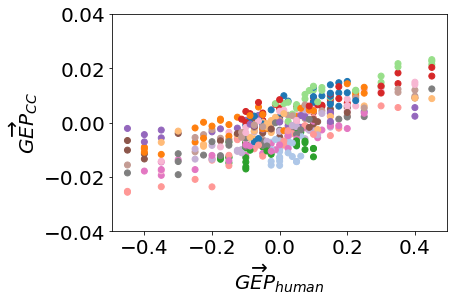

450 450
0.5487813493976197
0.4283265042642435


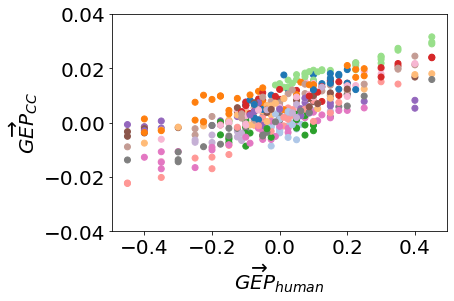

dalle
600 600
0.7085310506950276
0.6419771469100948


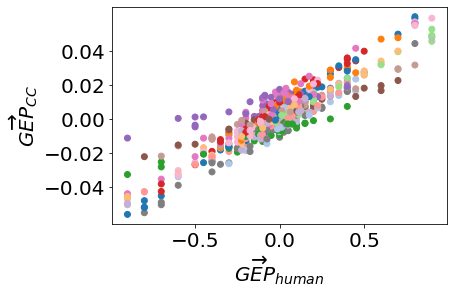

600 600
0.7296622136363979
0.6303512961211621


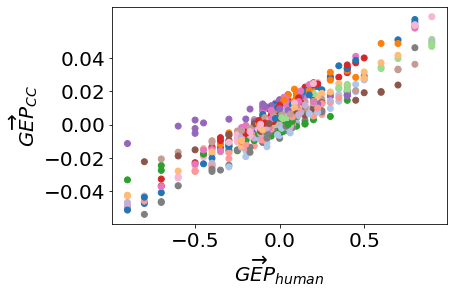

stable
600 600
0.6650852953019699
0.6036248488439161


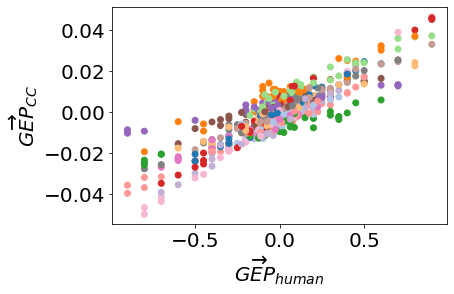

600 600
0.7038212305551536
0.6525105422322331


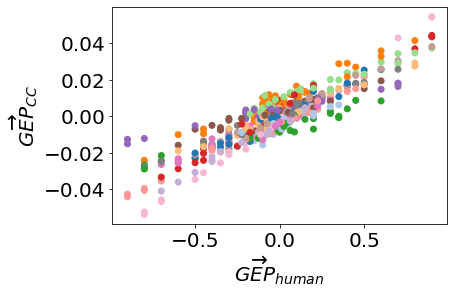

In [24]:
for idx in range(3):
    print(idx_to_name[idx])
    for app in range(2):
        print(len(app_crr_res[app][idx][0]), len(app_crr_res[app][idx][1]))
        x = np.array(app_crr_res[app][idx][0])
        y = np.array(app_crr_res[app][idx][1])
        print(kendalltau(x, y).correlation)
        print(matthews_corrcoef(to_binary(x), to_binary(y)))

        cc = x.shape[0] / 15
        assert cc == 30 or cc == 40
        plt.scatter(x, y, color=color_list * int(cc))
        plt.yticks([-0.04, -0.02, 0.00, 0.02, 0.04])
        plt.xlabel(r'$\overrightarrow{GEP}_{human}$')
        plt.ylabel(r'$\overrightarrow{GEP}_{CC}$')
        plt.show()

### Baselines

torch.Size([16, 768])
cogview2
man
woman
Neutral
0.023333333333333334
0.004494433924555779
KendalltauResult(correlation=0.41612518928823955, pvalue=0.03964987972015275)
Pearson CRR (0.8116144762405293, 0.0002390554931593912)
0.08006407690254358


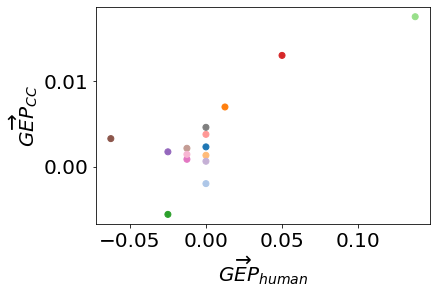

Explicit
0.1766666666666667
0.010972044337540864
KendalltauResult(correlation=0.6761904761904762, pvalue=0.00019989992034469547)
Pearson CRR (0.8813968093620378, 1.4099552134498158e-05)
0.1336306209562122
[0.1375, 0.025, 0.09999999999999998, -0.07500000000000001, -0.05, 0.6375000000000001, 0.49999999999999994, -0.30000000000000004, -0.025000000000000022, -0.15000000000000002, -0.13750000000000007, 0.07499999999999996, -0.1875, -0.11249999999999999, 0.13750000000000007] [0.019427333027124405, -0.000693627446889878, 0.017280518263578418, 0.005119109898805619, 0.0012289248406887054, 0.035542032122612, 0.023239743988960983, -0.018053817749023437, 0.00615009143948555, 0.001062157750129699, 0.002960795909166336, 0.015511560440063478, -0.012627045810222625, 0.004589000716805457, 0.0010949056595563889]


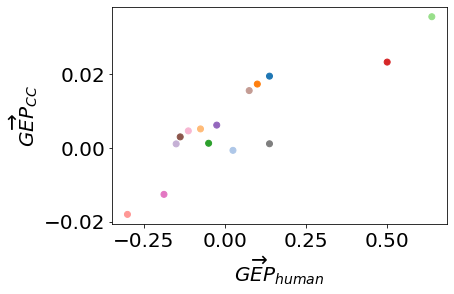

dalle
man
woman
Neutral
0.05083333333333333
0.00567994427556793
KendalltauResult(correlation=0.4134806532087095, pvalue=0.032910073123526694)
Pearson CRR (0.5309641203917393, 0.04169418324135573)
0.37796447300922725


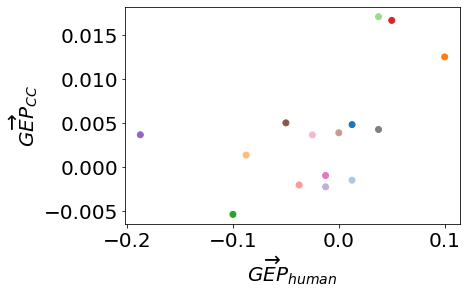

Explicit
0.11749999999999998
0.010374047458171843
KendalltauResult(correlation=0.32853692020305414, pvalue=0.09126183657556931)
Pearson CRR (0.7981260912317131, 0.0003619002459661004)
0.2
[0.07499999999999996, -0.13750000000000007, -0.025000000000000022, -0.012500000000000067, -0.17500000000000004, 0.875, 0.1875, -0.012499999999999956, -0.025000000000000022, 0.025000000000000022, -0.012499999999999956, -0.050000000000000044, -0.0625, -0.050000000000000044, 0.03749999999999998] [0.015355771780014037, -0.011540633440017697, 0.012012746930122373, 0.0032591879367828355, -0.010167604684829714, 0.03574353903532028, 0.016167259216308592, -0.0038110166788101196, 0.011367665231227874, 0.0060785472393035875, -0.002522863447666168, 0.004647758603096009, 0.012746691703796387, 0.005656158924102782, -0.004533267021179198]


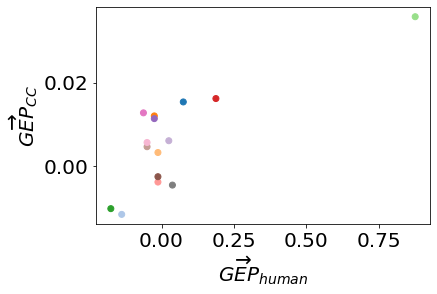

stable
man
woman
Neutral
0.06583333333333333
0.004773588354388873
KendalltauResult(correlation=0.34786262139146906, pvalue=0.07351968788012186)
Pearson CRR (0.6998833564122182, 0.003674185867033145)
0.2618924633082486


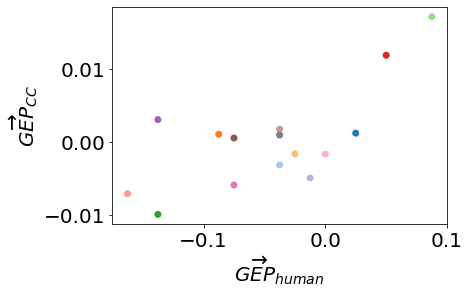

Explicit
0.13749999999999998
0.006578328857819238
KendalltauResult(correlation=0.49040728636381825, pvalue=0.011404656359906139)
Pearson CRR (0.8320097642804727, 0.00011960239905197018)
0.49099025303098287
[0.08750000000000002, 0.1375, -0.012499999999999956, -0.08750000000000002, -0.15000000000000002, 0.6375, 0.16249999999999998, -0.16249999999999998, -0.012500000000000067, -0.04999999999999993, -0.012500000000000067, 0.07499999999999996, -0.35000000000000003, 0.03749999999999998, 0.08750000000000002] [0.0029315486550331137, 0.00015621855854988133, 0.013437771797180174, -0.0016111254692077644, -0.012330675870180129, 0.024466871470212936, -0.0035789787769317585, -0.014222583174705504, 0.0007646873593330382, -0.005838075280189509, 0.0014904625713825226, 0.00012413859367370328, -0.01403138265013695, 0.0006895929574966403, 0.003000819683074951]


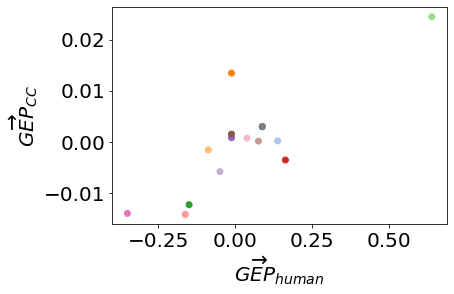

In [15]:
detection_query = ['an object', 'boots', 'slippers', 'jeans', 'shorts', 'slacks', 'a dress', 'a skirt', 'a suit', 'a shirt', 'uniform', 'a jacket', 'a hat', 'a tie', 'a mask', 'gloves']
d_texts = clip.tokenize(detection_query).to(device)
detection_fea = model.encode_text(d_texts).to(device).float()
detection_fea = detection_fea / detection_fea.norm(dim=1, keepdim=True)
print(detection_fea.shape)

np.set_printoptions(precision=2)

for idx in range(3):
    print(idx_to_name[idx])

    detection_res_man_base = []
    detection_res_woman_base = []
    detection_res_man_att = []
    detection_res_woman_att = []

    att_auc = {'man':[], 'woman':[]}
    mix_gender_true = [[] for _ in range(15)]
    mix_gender_pred = [[] for _ in range(15)]
    mix_gender_auc = []


    for gender, img_fea in (('man', m_imgs[idx]), ('woman', f_imgs[idx])):
        print(gender)
        for i in range(1, 16):
            c_query = torch.cat([detection_fea[0].unsqueeze(0), detection_fea[i].unsqueeze(0)], dim=0)
            c_keys = torch.cat([img_fea[:16], img_fea[16 * i:16 * (i + 1)]], dim=0).view(160, -1)
            res = c_query @ c_keys.T
            # detection = res[1]
            detection = res[1] - res[0]

            att_auc[gender].append(roc_auc_score(ground_truths[idx][gender][i - 1].tolist(), detection.tolist()))
            mix_gender_true[i - 1].extend(ground_truths[idx][gender][i - 1].tolist())
            mix_gender_pred[i - 1].extend(detection.tolist())

            if gender == 'man':
                detection_res_man_base.append(torch.sum(detection[:80]).item() / 80.0)
                detection_res_man_att.append(torch.sum(detection[80:]).item() / 80.0)
            else:
                detection_res_woman_base.append(torch.sum(detection[:80]).item() / 80.0)
                detection_res_woman_att.append(torch.sum(detection[80:]).item() / 80.0)

    for i in range(15):
        mix_gender_auc.append(roc_auc_score(mix_gender_true[i], mix_gender_pred[i]))

    x = np.array([f_bases[idx][i] - m_bases[idx][i] for i in range(15)])
    y = np.array([detection_res_woman_base[i] - detection_res_man_base[i] for i in range(15)])

    print("Neutral")
    print(np.mean(np.abs(x)))
    print(np.mean(np.abs(y)))

    print(kendalltau(x, y))
    print("Pearson CRR", pearsonr(x, y))
    print(matthews_corrcoef(to_binary(x), to_binary(y)))

    plt.scatter(x, y, color=color_list)
    plt.xlabel(r'$\overrightarrow{GEP}_{human}$')
    plt.ylabel(r'$\overrightarrow{GEP}_{CC}$')
    plt.show()


    x = np.array([f_atts[idx][i] - m_atts[idx][i] for i in range(15)])
    y = np.array([detection_res_woman_att[i] - detection_res_man_att[i] for i in range(15)])

    print("Explicit")
    print(np.mean(np.abs(x)))
    print(np.mean(np.abs(y)))

    print(kendalltau(x, y))
    print("Pearson CRR", pearsonr(x, y))
    print(matthews_corrcoef(to_binary(x), to_binary(y)))

    print(x.tolist(), y.tolist())

    plt.scatter(x, y, color=color_list)
    plt.xlabel(r'$\overrightarrow{GEP}_{human}$')
    plt.ylabel(r'$\overrightarrow{GEP}_{CC}$')
    plt.show()

### Artificial datasets: Cross-modal classifier

In [26]:
from tqdm.notebook import tqdm, trange
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

people = ['A man', 'A woman', 'A person']

attribute_set = ['',
                 ' in boots', 
                 ' in slippers', 
                 ' in jeans',
                 ' in shorts',
                 ' in slacks',
                 ' in a dress',
                 ' in a skirt',
                 ' in a suit',
                 ' in a shirt',
                 ' in uniform',
                 ' in a jacket',
                 ' in a hat',
                 ' with a tie',
                 ' with a mask',
                 ' with gloves'
]
contexts = [' sitting at a table.',
            ' sitting on a bed.',
            ' standing on a skateboard.',
            ' standing next to a rack.',
            ' riding a bike.',
            ' riding a horse.',
            ' laying on the snow.',
            ' laying on a couch.',
            ' walking through a forest.',
            ' walking down a sidewalk.',
            ' holding up a smartphone.',
            ' holding an umbrella.',
            ' jumping into the air.',
            ' jumping over a box.',
            ' running across the park.',
            ' running on the beach.']

len_con = len(contexts) * len(people)
text_list = [person + item + context for item in attribute_set for context in contexts for person in people]
print(len_con)
print(len(text_list))

@torch.no_grad()
def get_text_feature(text_list):
    text_features = []
    for batch_idx in trange(0, len(text_list), 8):
        c_texts = [text_list[idx] for idx in range(batch_idx, min(batch_idx + 8, len(text_list)))]
        text_input = clip.tokenize(c_texts).to(device)
        text_features.append(model.encode_text(text_input).to(device).float())
    return torch.cat(text_features, dim=0)

text_fes = get_text_feature(text_list)
print(text_fes.shape)
with torch.no_grad():
    text_fes = text_fes / text_fes.norm(dim=1, keepdim=True)


app_crr_res_1 = [[[[], []], [[], []], [[], []]], [[[], []], [[], []], [[], []]], [[[], []], [[], []], [[], []]]]

for scalar, model_idx in [(1.0, 1), (0.5, 0), (0.25, 0), (0.125, 0)]:
    times = 10
    shuffle_seed = 0

    np.random.seed(shuffle_seed)

    cc = 0
    for cnt in range(times):
        for idx in range(model_idx, 3):
            cc += 1

            final_random_bias, f_test_img_fes, m_test_img_fes = get_random_test_features(idx_to_name[idx], res_nps[idx], scalar=scalar)

            for app in range(1):
                man_res_add = [[] for _ in range(15)]
                woman_res_add = [[] for _ in range(15)]

                inner_times = 10

                for gender, img_fea in (('man', m_test_img_fes), ('woman', f_test_img_fes)):
                    res_add = [[] for _ in range(15)]

                    for trial in range(inner_times):
                        for i in range(1, 16):
                            zero_features = text_fes[:len_con]
                            one_features = text_fes[len_con * i: len_con * i + len_con]
                            features = torch.cat([zero_features, one_features], dim=0).cpu().numpy()
                            labels = np.array([0] * len_con + [1] * len_con)

                            test_feature = img_fea[80 * (i - 1):80 * i].view(80, -1).cpu().numpy()

                            X = features
                            Y = labels
                            clf = make_pipeline(SGDClassifier(max_iter=5000, loss='log_loss', tol=1e-3, random_state=trial, validation_fraction=0.1, early_stopping=True))
                            clf.fit(X, Y)

                            pred = clf.predict_proba(test_feature)[:, 1]

                            res_add[i - 1].append(np.mean(pred, axis=0))
                    res_add = [np.mean(np.array(item), axis=0) for item in res_add]

                    if gender == 'man':
                        man_res_add = res_add
                    elif gender == 'woman':
                        woman_res_add = res_add

                x = np.array(np.array(final_random_bias))
                y = np.array([woman_res_add[i] - man_res_add[i] for i in range(15)])

                app_crr_res_1[app][idx][0].extend(x.tolist())
                app_crr_res_1[app][idx][1].extend(y.tolist())

48
768


  0%|          | 0/96 [00:00<?, ?it/s]

torch.Size([768, 768])


cogview2
450 450
Pearson CRR (0.7921105869909263, 4.215699710299159e-98)
0.5899160643071086
0.5197873294803735


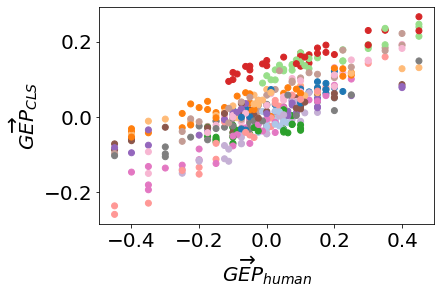

dalle
600 600
Pearson CRR (0.9435774200455832, 3.2728201338872915e-289)
0.7796373012330647
0.692522119215025


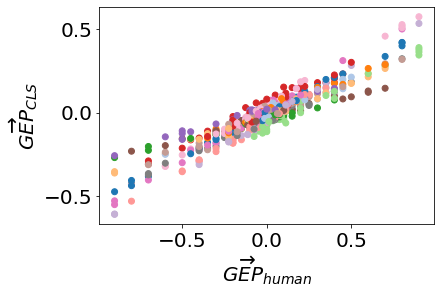

stable
600 600
Pearson CRR (0.9162462669286571, 9.603964002059995e-240)
0.7475189741085995
0.7248792246439989


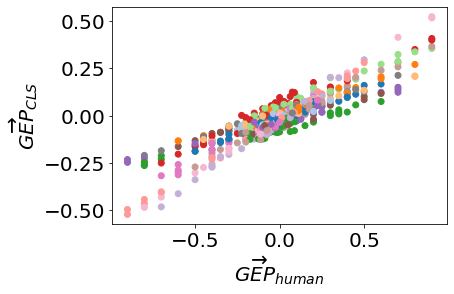

In [28]:
group_list = [i for i in range(15)]
for idx in range(0, 3):
    print(idx_to_name[idx])
    for app in range(1):
        print(len(app_crr_res_1[app][idx][0]), len(app_crr_res_1[app][idx][1]))
        x = np.array(app_crr_res_1[app][idx][0])
        y = np.array(app_crr_res_1[app][idx][1])

        print("Pearson CRR", pearsonr(x, y))
        print(kendalltau(x, y).correlation)
        print(matthews_corrcoef(to_binary(x), to_binary(y)))

        cc = int(x.shape[0] / 15)
        assert cc == 30 or cc == 40

        plt.scatter(x, y, color=color_list * int(cc))
        plt.xlabel(r'$\overrightarrow{GEP}_{human}$')
        plt.ylabel(r'$\overrightarrow{GEP}_{CLS}$')
        plt.show()

In [29]:
for app in range(1):
    x = np.array(app_crr_res_1[app][0][0] + app_crr_res_1[app][1][0] + app_crr_res_1[app][2][0])
    y = np.array(app_crr_res_1[app][0][1] + app_crr_res_1[app][1][1] + app_crr_res_1[app][2][1])
    print(x.shape, y.shape, x[:10], y[:10])
    print("Pearson CRR", pearsonr(x, y))
    print(kendalltau(x, y))
    print(matthews_corrcoef(to_binary(x), to_binary(y)))

    # Kendall's tau ablation study
    group_list = [i * 3 + 0 for i in range(15)] * 30 + [i * 3 + 1 for i in range(15)] * 40 + [i * 3 + 2 for i in range(15)] * 40
    print("dm, da", inter_kt_norm_cross_model(x, y, group_list, 3), "upperboud", inter_kt_norm_cross_model(x, x, group_list, 3))
    print("dm, sa", intra_kt_norm_cross_model(x, y, group_list, 3), "upperboud", intra_kt_norm_cross_model(x, x, group_list, 3))
    print("sm, da", inter_kt_norm_cross_model(x, y, group_list, 3, cross=False), "upperboud", inter_kt_norm_cross_model(x, x, group_list, 3, cross=False))
    print("sm, sa", intra_kt_norm_cross_model(x, y, group_list, 3, cross=False), "upperboud", intra_kt_norm_cross_model(x, x, group_list, 3, cross=False))

(1650,) (1650,) [-0.1   0.   -0.25  0.45 -0.15  0.3   0.2  -0.45 -0.35  0.1 ] [ 0.00548981 -0.01672222 -0.0290305   0.13063964 -0.06165914  0.19149529
  0.16544927 -0.25931999 -0.07551729 -0.01202017]
Pearson CRR (0.9060553329105395, 0.0)
KendalltauResult(correlation=0.7070414425895932, pvalue=0.0)
0.6534250034536169
840000
840000
dm, da 0.6951498262580086 upperboud 1.0
60000
60000
dm, sa 0.7314130697135576 upperboud 1.0
430500
430500
sm, da 0.7171437703477511 upperboud 1.0
29925
29925
sm, sa 0.8468661867669995 upperboud 1.0


### Cross-modal classifiers

In [16]:
from tqdm.notebook import tqdm, trange

people = ['A man', 'A woman', 'A person']

attribute_set = ['',
                 ' in boots', 
                 ' in slippers', 
                 ' in jeans',
                 ' in shorts',
                 ' in slacks',
                 ' in a dress',
                 ' in a skirt',
                 ' in a suit',
                 ' in a shirt',
                 ' in uniform',
                 ' in a jacket',
                 ' in a hat',
                 ' with a tie',
                 ' with a mask',
                 ' with gloves'
]
contexts = [' sitting at a table.',
            ' sitting on a bed.',
            ' standing on a skateboard.',
            ' standing next to a rack.',
            ' riding a bike.',
            ' riding a horse.',
            ' laying on the snow.',
            ' laying on a couch.',
            ' walking through a forest.',
            ' walking down a sidewalk.',
            ' holding up a smartphone.',
            ' holding an umbrella.',
            ' jumping into the air.',
            ' jumping over a box.',
            ' running across the park.',
            ' running on the beach.']

len_con = len(contexts) * len(people)
text_list = [person + item + context for item in attribute_set for context in contexts for person in people]
print(len_con)
print(len(text_list))

@torch.no_grad()
def get_text_feature(text_list):
    text_features = []
    for batch_idx in trange(0, len(text_list), 8):
        c_texts = [text_list[idx] for idx in range(batch_idx, min(batch_idx + 8, len(text_list)))]
        text_input = clip.tokenize(c_texts).to(device)
        text_features.append(model.encode_text(text_input).to(device).float())
    return torch.cat(text_features, dim=0)

text_fes = get_text_feature(text_list)
print(text_fes.shape)
with torch.no_grad():
    text_fes = text_fes / text_fes.norm(dim=1, keepdim=True)

48
768


  0%|          | 0/96 [00:00<?, ?it/s]

torch.Size([768, 768])


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Time(sec) 1.5765445232391357
15
150
[0.85 0.93 0.84 0.83 0.72 0.93 0.86 0.95 0.77 0.9  0.81 0.9  0.92 0.92
 0.85]
0.8645172148836057
Neutral
0.023333333333333334
0.03790036354237388
KendalltauResult(correlation=0.49935022714588745, pvalue=0.013554666064815549)
Pearson CRR (0.7566630490112356, 0.0010936840601430133)
0.16666666666666666


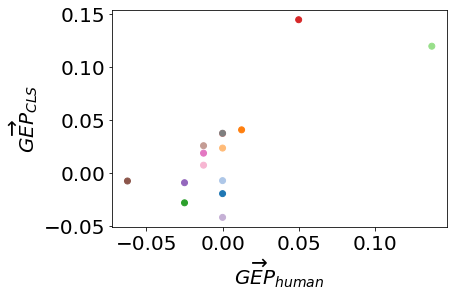

Explicit
0.1766666666666667
0.09256969483360347
[ 0.14  0.03  0.1  -0.08 -0.05  0.64  0.5  -0.3  -0.03 -0.15 -0.14  0.07
 -0.19 -0.11  0.14] [ 0.1  -0.01  0.09  0.03 -0.04  0.31  0.26 -0.2   0.02 -0.05 -0.02  0.11
 -0.13 -0.    0.01]
KendalltauResult(correlation=0.7333333333333334, pvalue=3.702856397962218e-05)
Pearson CRR (0.9484797147201712, 7.3671252834845e-08)
0.6071428571428571


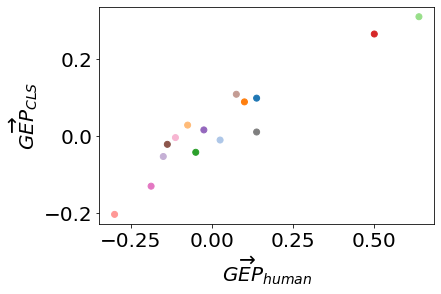

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Time(sec) 1.6131408214569092
15
150
[0.97 0.9  0.96 0.96 0.88 0.97 0.98 0.99 0.89 0.99 0.88 0.93 0.99 0.99
 0.98]
0.9495128882203577
Neutral
0.05083333333333333
0.042634580390866685
KendalltauResult(correlation=0.567333919518927, pvalue=0.0034233741662828506)
Pearson CRR (0.5909449050809189, 0.020349763691556357)
0.600099198148979


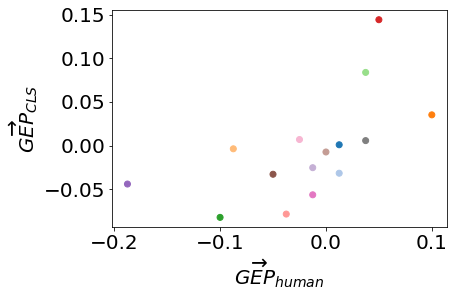

Explicit
0.11749999999999998
0.05184313349828935
[ 0.07 -0.14 -0.03 -0.01 -0.18  0.88  0.19 -0.01 -0.03  0.03 -0.01 -0.05
 -0.06 -0.05  0.04] [ 0.03 -0.05  0.   -0.06 -0.06  0.23  0.04 -0.05  0.02 -0.04 -0.04 -0.05
  0.04  0.03 -0.06]
KendalltauResult(correlation=0.23190841426097936, pvalue=0.2332302227821852)
Pearson CRR (0.8761576929119834, 1.843027679587873e-05)
0.18898223650461363


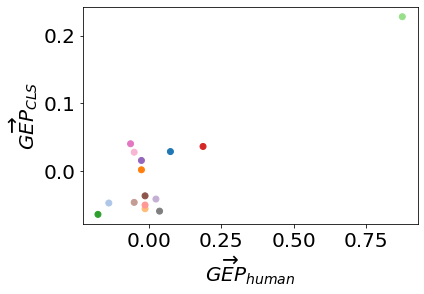

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Time(sec) 1.5666391849517822
15
150
[0.87 0.84 0.91 0.87 0.84 0.88 0.94 0.96 0.82 0.97 0.8  0.96 0.94 0.98
 0.82]
0.8924049317205796
Neutral
0.06583333333333333
0.0447338087844881
KendalltauResult(correlation=0.6377481392176934, pvalue=0.0010347025514757825)
Pearson CRR (0.8701193521845757, 2.4736719793931888e-05)
0.3181818181818182


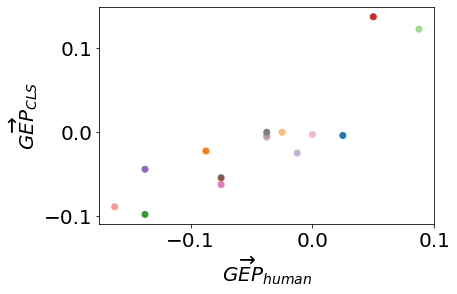

Explicit
0.13749999999999998
0.06321537888340775
[ 0.09  0.14 -0.01 -0.09 -0.15  0.64  0.16 -0.16 -0.01 -0.05 -0.01  0.07
 -0.35  0.04  0.09] [-0.01  0.01  0.03 -0.03 -0.11  0.23  0.02 -0.12 -0.07 -0.07 -0.01 -0.06
 -0.16  0.01  0.03]
KendalltauResult(correlation=0.7019555275403673, pvalue=0.0002929645408835004)
Pearson CRR (0.9372965133379578, 2.5703459048610564e-07)
0.600099198148979


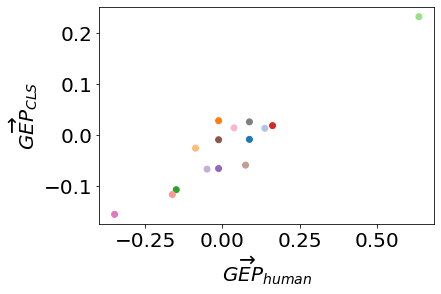

In [17]:
from tqdm.notebook import tqdm, trange
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
import time

np.set_printoptions(precision=2)

for idx in range(3):

    man_res_base = [[] for _ in range(15)]
    man_res_add = [[] for _ in range(15)]
    woman_res_base = [[] for _ in range(15)]
    woman_res_add = [[] for _ in range(15)]

    lawyer_res_base = [[] for _ in range(15)]
    lawyer_res_add = [[] for _ in range(15)]

    att_auc = {'man':[], 'woman':[]}
    mix_gender_true = [[] for _ in range(15)]
    mix_gender_pred = [[] for _ in range(15)]
    mix_gender_auc = []

    times = 10
    jeans_res = {'man':[], 'woman':[]}

    start = time.time()

    for gender, img_fea in (('man', m_imgs[idx]), ('woman', f_imgs[idx])):
        res_base = [[] for _ in range(15)]
        res_add = [[] for _ in range(15)]

        for trial in trange(times):
            for i in range(1, 16):
                zero_features = text_fes[:len_con]
                one_features = text_fes[len_con * i: len_con * i + len_con]
                features = torch.cat([zero_features, one_features], dim=0).cpu().numpy()
                labels = np.array([0] * len_con + [1] * len_con)

                base_feature = img_fea[:16].reshape(80, -1).cpu().numpy()
                one_feature = img_fea[16 * i:16 * (i + 1)].reshape(80, -1).cpu().numpy()
                test_feature = np.concatenate([base_feature, one_feature], axis=0)

                X = features
                Y = labels
                clf = make_pipeline(SGDClassifier(max_iter=5000, loss='log_loss', tol=1e-3, random_state=trial, validation_fraction=0.1, early_stopping=True))
                clf.fit(X, Y)

                train_pred = clf.predict(features)
                acc = np.sum(labels == train_pred) / labels.shape[0]
                pred = clf.predict_proba(test_feature)[:, 1]

                res_base[i - 1].append(np.mean(pred[:80], axis=0))
                res_add[i - 1].append(np.mean(pred[80:], axis=0))
                
                att_auc[gender].append(roc_auc_score(ground_truths[idx][gender][i - 1].tolist(), pred))
                mix_gender_true[i - 1].extend(ground_truths[idx][gender][i - 1].tolist())
                mix_gender_pred[i - 1].extend(pred)

        res_base = [np.mean(np.array(item), axis=0) for item in res_base]
        res_add = [np.mean(np.array(item), axis=0) for item in res_add]

        if gender == 'man':
            man_res_base = res_base
            man_res_add = res_add
        elif gender == 'woman':
            woman_res_base = res_base
            woman_res_add = res_add
        else:
            lawyer_res_base = res_base
            lawyer_res_add = res_add

    end = time.time()
    print("Time(sec)", end - start)

    print(len(mix_gender_pred))
    for i in range(15):
        for j in range(times):
            mix_gender_auc.append(roc_auc_score(mix_gender_true[i][320 * j: 320 * (j + 1)], mix_gender_pred[i][320 * j: 320 * (j + 1)]))
    print(len(mix_gender_auc))
    print(np.mean(np.array(mix_gender_auc).reshape(15, times), axis=1))
    print(np.mean(mix_gender_auc))

    x = np.array([f_bases[idx][i] - m_bases[idx][i] for i in range(15)])
    y = np.array([woman_res_base[i] - man_res_base[i] for i in range(15)])
    print("Neutral")
    print(np.mean(np.abs(x)))
    print(np.mean(np.abs(y)))

    print(kendalltau(x, y))
    print("Pearson CRR", pearsonr(x, y))
    print(matthews_corrcoef(to_binary(x), to_binary(y)))

    plt.scatter(x, y, color=color_list)
    plt.xlabel(r'$\overrightarrow{GEP}_{human}$')
    plt.ylabel(r'$\overrightarrow{GEP}_{CLS}$')
    plt.show()

    x = np.array([f_atts[idx][i] - m_atts[idx][i] for i in range(15)])
    y = np.array([woman_res_add[i] - man_res_add[i] for i in range(15)])
    print("Explicit")
    print(np.mean(np.abs(x)))
    print(np.mean(np.abs(y)))

    print(x, y)

    print(kendalltau(x, y))
    print("Pearson CRR", pearsonr(x, y))
    print(matthews_corrcoef(to_binary(x), to_binary(y)))

    plt.scatter(x, y, color=color_list)
    plt.xlabel(r'$\overrightarrow{GEP}_{human}$')
    plt.ylabel(r'$\overrightarrow{GEP}_{CLS}$')
    plt.show()